# EDA

In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm,skew

from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# データの読み込み
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submit.csv',names=('id','pred'))

# 行数を変数として指定
ntrain = train.shape[0]
ntest = test.shape[0]

In [3]:
# データ数の確認
train.shape, test.shape

((55583, 29), (18528, 28))

In [4]:
train.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [5]:
test.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [6]:
sub.head()

,id,pred
0,0,10
1,1,10
2,2,10
3,3,10
4,4,10


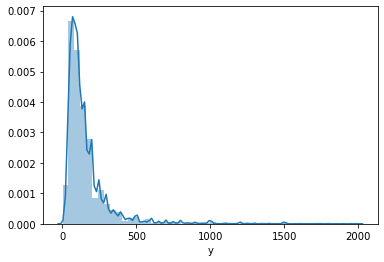

In [7]:
sns.distplot(train['y']);

In [8]:
# 歪度と尖度を表示
print("歪度: %f" % train['y'].skew())
print("尖度: %f" % train['y'].kurt())

歪度: 4.264338
尖度: 26.030945


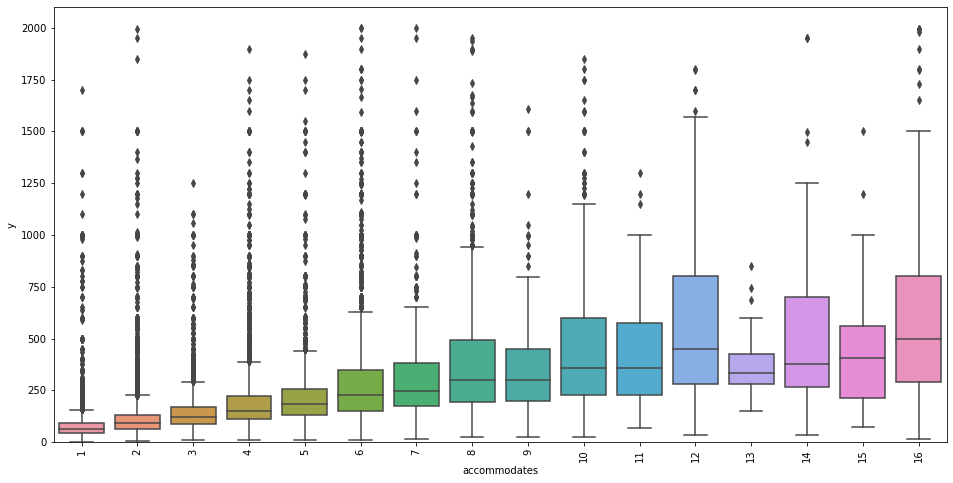

In [9]:
var = 'accommodates'
data = pd.concat([train['y'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=2100);
plt.xticks(rotation=90);

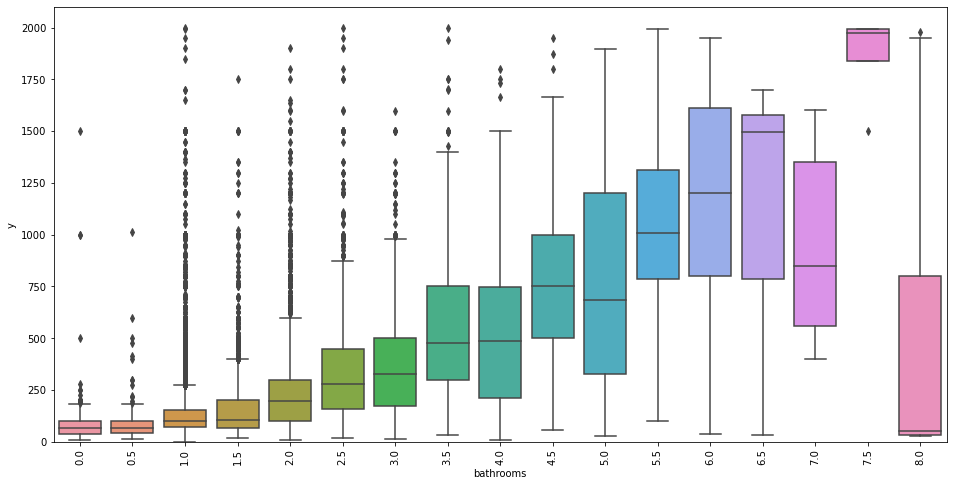

In [10]:
var = 'bathrooms'
data = pd.concat([train['y'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=2100);
plt.xticks(rotation=90);

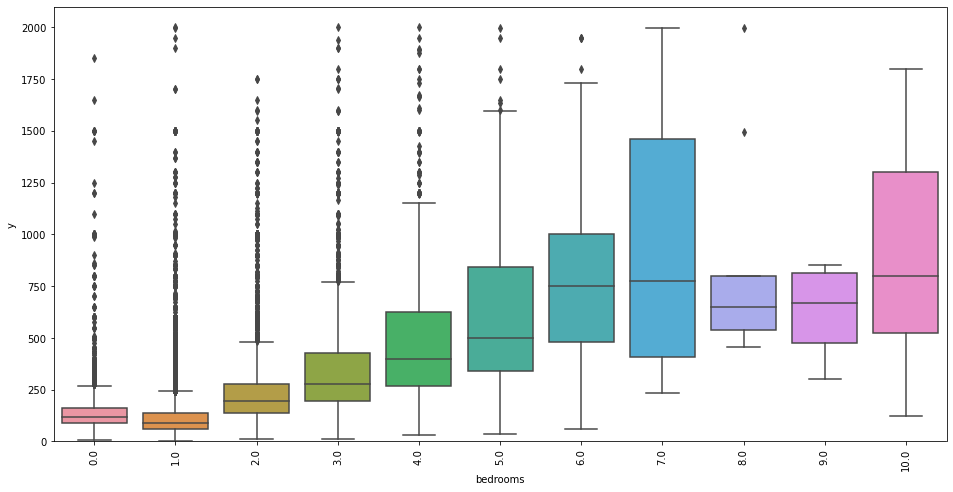

In [11]:
var = 'bedrooms'
data = pd.concat([train['y'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=2100);
plt.xticks(rotation=90);

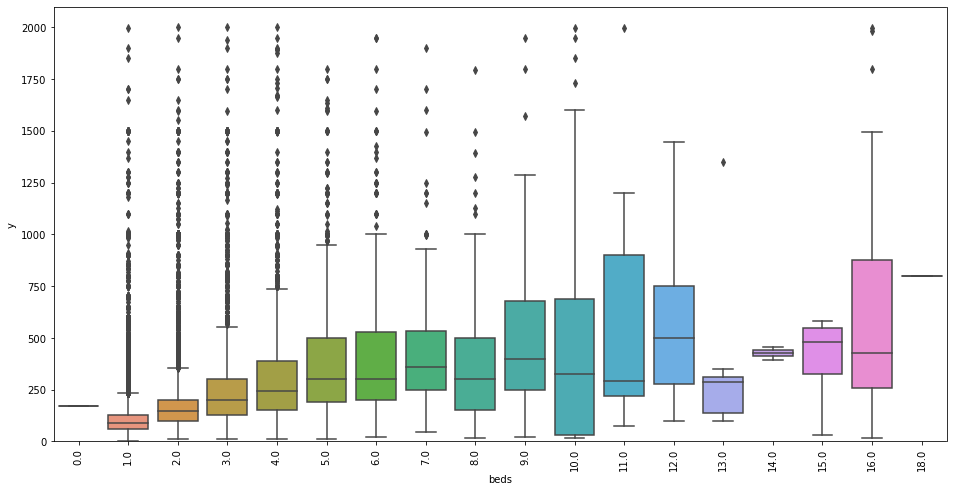

In [12]:
var = 'beds'
data = pd.concat([train['y'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=2100);
plt.xticks(rotation=90);
del data

# データの前処理


 mu = 160.16 and sigma = 168.09



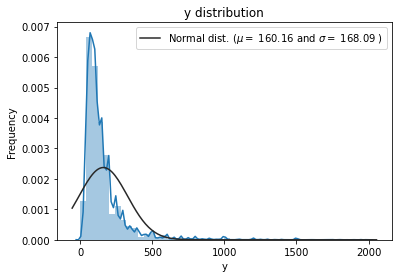

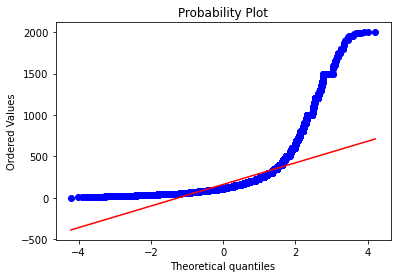

In [13]:
# 処理前
sns.distplot(train['y'] , fit=norm);

# パラメータを取得
(mu, sigma) = norm.fit(train['y'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 可視化
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

# 正規QQプロットの適用
fig = plt.figure()
res = stats.probplot(train['y'], plot=plt)
plt.show()


 mu = 4.79 and sigma = 0.71



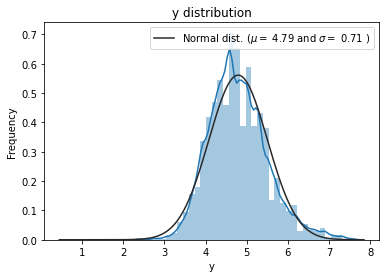

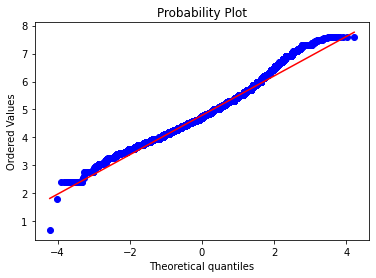

In [14]:
# 処理後
# log1p(numpyの関数)を適用、対数をとる
train["y"] = np.log1p(train["y"])

# 適用後の分布を確認
sns.distplot(train['y'] , fit=norm);

# パラメータを取得
(mu, sigma) = norm.fit(train['y'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 可視化
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

# 正規QQプロットの適用
fig = plt.figure()
res = stats.probplot(train['y'], plot=plt)
plt.show()

In [15]:
# y列を抽出
train_y = train['y']
train_y.shape

(55583,)

In [16]:
# 学習データと検証データを結合
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['y','id'], axis=1, inplace=True)
print("all_data size : {}".format(all_data.shape))

all_data size : (74111, 27)


In [17]:
# 欠損値の割合を確認
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
host_response_rate,24.691341
review_scores_rating,22.563452
first_review,21.405729
last_review,21.355804
thumbnail_url,11.086074
neighbourhood,9.272578
zipcode,1.303450
bathrooms,0.269865
host_since,0.253674
host_identity_verified,0.253674


In [18]:
# 年月関連の変数を全て浮動小数点型に変換し、欠損値は0で埋める
for c in ('first_review','last_review','host_since'):
    all_data[c] = pd.to_datetime(all_data[c])
    all_data[c] = pd.DatetimeIndex(all_data[c])
    all_data[c] = np.log(all_data[c].values.astype(np.float64))
    all_data[c] = all_data[c].fillna(0)

# 欠損値を1で埋める
for c in ('bathrooms','beds','bedrooms'):
    all_data[c] = all_data[c].fillna(1)
    
# 欠損値をNoneで埋める
for c in ('host_response_rate','neighbourhood','host_identity_verified','host_has_profile_pic'):
    all_data[c] = all_data[c].fillna('None')

# 中央値で埋める
all_data['review_scores_rating'].fillna(all_data['review_scores_rating'].median(),inplace=True)

# 使わない列を落とす
all_data = all_data.drop(['thumbnail_url','zipcode'],axis=1)

In [19]:
# 欠損値がないか再度確認
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [20]:
all_data.dtypes

accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
description                object
first_review              float64
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                float64
instant_bookable           object
last_review               float64
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
dtype: object

In [21]:
# ラベルエンコーディング
cols = ('bed_type','cancellation_policy','city','cleaning_fee','host_identity_verified','host_has_profile_pic',
        'host_response_rate','instant_bookable','property_type','room_type','neighbourhood')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
        
all_data.dtypes

accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                    int64
bedrooms                  float64
beds                      float64
cancellation_policy         int64
city                        int64
cleaning_fee                int64
description                object
first_review              float64
host_has_profile_pic        int64
host_identity_verified      int64
host_response_rate          int64
host_since                float64
instant_bookable            int64
last_review               float64
latitude                  float64
longitude                 float64
name                       object
neighbourhood               int64
number_of_reviews           int64
property_type               int64
review_scores_rating      float64
room_type                   int64
dtype: object

In [22]:
# 対象の列の文字数をカウント
for c in ('amenities','description','name'):
    all_data[c] = all_data[c].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
    
all_data.dtypes

accommodates                int64
amenities                   int64
bathrooms                 float64
bed_type                    int64
bedrooms                  float64
beds                      float64
cancellation_policy         int64
city                        int64
cleaning_fee                int64
description                 int64
first_review              float64
host_has_profile_pic        int64
host_identity_verified      int64
host_response_rate          int64
host_since                float64
instant_bookable            int64
last_review               float64
latitude                  float64
longitude                 float64
name                        int64
neighbourhood               int64
number_of_reviews           int64
property_type               int64
review_scores_rating      float64
room_type                   int64
dtype: object

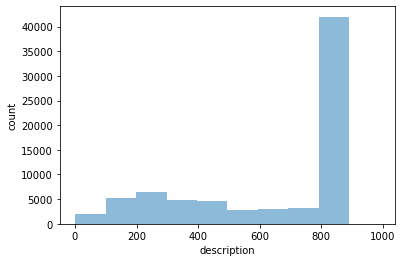

In [23]:
# descriptionのヒストグラム
plt.hist(all_data['description'],alpha=0.5)
plt.xlabel('description')
plt.ylabel('count')
plt.show()

In [24]:
# 新しい特徴量をつくる
# bathroomsとbedroomsの数を足し上げる
all_data['total_rooms'] = all_data['bathrooms'] + all_data['bedrooms']

# 学習・予測・提出

In [25]:
# 学習データと検証データに分ける
train = all_data[:ntrain]
test = all_data[ntrain:]

In [26]:
# LGBMRegressorを用いて学習
model = lgb.LGBMRegressor(num_leaves=100,learning_rate=0.05,n_estimators=1000)
model.fit(train,train_y)

# 学習したモデルで検証データを予測
pred = np.expm1(model.predict(test))

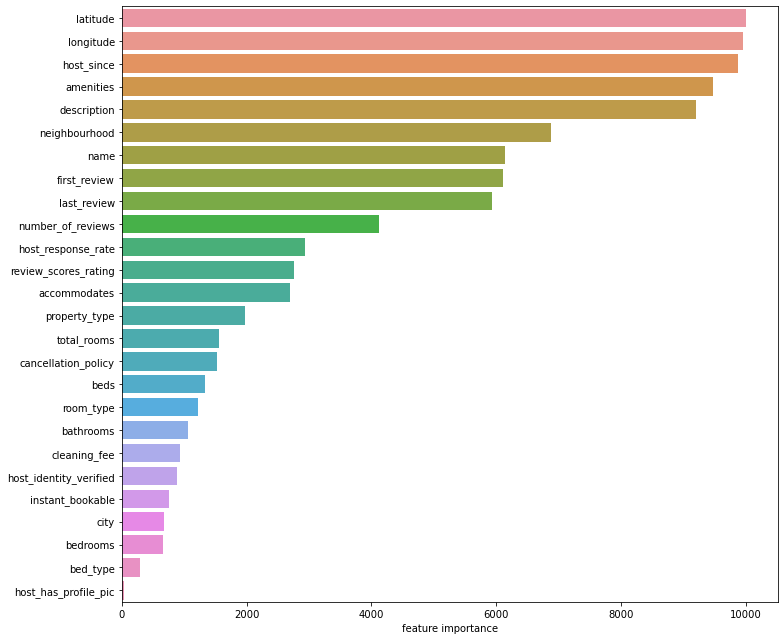

In [27]:
# 変数重要度を可視化
ranking = np.argsort(-model.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=model.feature_importances_[ranking],y=train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [28]:
# 提出
sub['pred'] = pred
sub.to_csv('sub.csv',index=False,header=None)